## Import dependencies

In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

## Determining joints
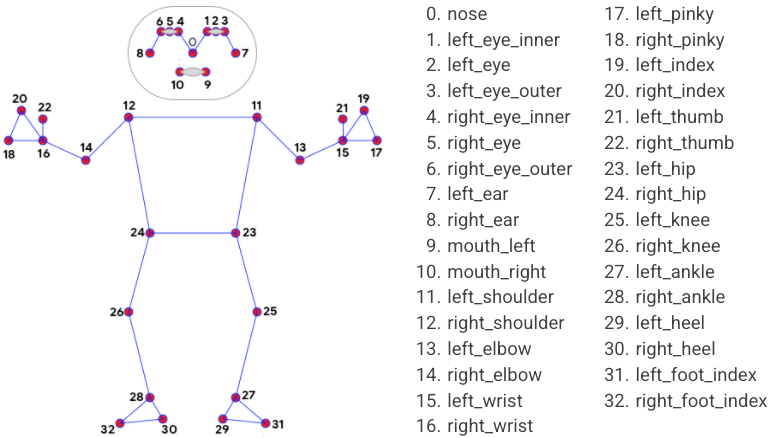

In [2]:
cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolour image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolour back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Render detection
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245, 117, 230), thickness=2, circle_radius=2),
                                 )
        
        cv2.imshow('MediaPipe', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[x: 0.5230342745780945
y: 0.11911538243293762
z: 0.47862520813941956
visibility: 0.920840859413147
, x: 0.514113187789917
y: 0.10427677631378174
z: 0.45763450860977173
visibility: 0.9540833234786987
, x: 0.518968939781189
y: 0.10693499445915222
z: 0.45763006806373596
visibility: 0.9553688168525696
, x: 0.49980443716049194
y: 0.10715767741203308
z: 0.45751017332077026
visibility: 0.9621835947036743
, x: 0.5290884971618652
y: 0.10690382122993469
z: 0.4476950168609619
visibility: 0.9373961091041565
, x: 0.5323601961135864
y: 0.10663118958473206
z: 0.44775494933128357
visibility: 0.9261825680732727
, x: 0.5352640151977539
y: 0.10683217644691467
z: 0.4476225972175598
visibility: 0.9279547333717346
, x: 0.4902935028076172
y: 0.11611080169677734
z: 0.34993651509284973
visibility: 0.9739417433738708
, x: 0.5348844528198242
y: 0.11069479584693909
z: 0.3031575083732605
visibility: 0.952090859413147
, x: 0.5109934210777283
y: 0.13597625494003296
z: 0.4450700879096985
visibility: 0.943511068820953

In [3]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [4]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.7917982935905457
y: 0.8202311396598816
z: -0.3981183171272278
visibility: 0.9959328174591064

In [5]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.9303127527236938
y: 1.2336316108703613
z: -0.3722912073135376
visibility: 0.23770186305046082

In [6]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.9409934282302856
y: 1.5659693479537964
z: -0.8168146014213562
visibility: 0.33088219165802

## Calculate angles

In [7]:
def calculate_angle(a, b, c):
    a = np.array(a) # first
    b = np.array(b) # mid
    c = np.array(c) # last
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    
    return angle

In [8]:
l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [9]:
l_shoulder, l_elbow, l_wrist

([0.7917982935905457, 0.8202311396598816],
 [0.9303127527236938, 1.2336316108703613],
 [0.9409934282302856, 1.5659693479537964])

### Left Bicep Curl

In [19]:
def left_bicep_curl():
    cap = cv2.VideoCapture(0)

    # Curl counter
    counter = 0
    stage = None

    # Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolour image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolour back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark

                # Get coordinates
                l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

                # Calculate angle
                angle = calculate_angle(l_shoulder, l_elbow, l_wrist)

                # Visualize angle
                cv2.putText(image, str(angle),
                            tuple(np.multiply(l_elbow, [640, 480]).astype(int)),
                                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                           )

                # Curl counter logic
                if angle > 160:
                    stage = "DOWN"
                if angle < 30 and stage == "DOWN":
                    stage = "UP"
                    counter += 1
            
            except:
                pass

            # Render curl counter
            # Setup status box
            cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)

            # Rep Data
            cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 1, cv2.LINE_AA)

            # Stage Data
            cv2.putText(image, 'STAGE', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, stage, (130, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 1, cv2.LINE_AA)


            # Render detection
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(245, 117, 230), thickness=2, circle_radius=2),
                                     )

            cv2.imshow('Left Bicep Curl Counter', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

### Right Bicep Curl

In [20]:
def right_bicep_curl():
    cap = cv2.VideoCapture(0)

    # Curl counter
    counter = 0
    stage = None

    # Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolour image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolour back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark

                # Get coordinates
                r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

                # Calculate angle
                angle = calculate_angle(r_shoulder, r_elbow, r_wrist)

                # Visualize angle
                cv2.putText(image, str(angle),
                            tuple(np.multiply(r_elbow, [640, 480]).astype(int)),
                                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                           )

                # Curl counter logic
                if angle > 160:
                    stage = "DOWN"
                if angle < 30 and stage == "DOWN":
                    stage = "UP"
                    counter += 1
            
            except:
                pass

            # Render curl counter
            # Setup status box
            cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)

            # Rep Data
            cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 1, cv2.LINE_AA)

            # Stage Data
            cv2.putText(image, 'STAGE', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, stage, (130, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 1, cv2.LINE_AA)


            # Render detection
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(245, 117, 230), thickness=2, circle_radius=2),
                                     )

            cv2.imshow('Right Bicep Curl Counter', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

### Left Squats

In [21]:
def left_squats():
    cap = cv2.VideoCapture(0)

    # Curl counter
    counter = 0
    stage = None

    # Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolour image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolour back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark

                # Get coordinates
                l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
                l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

                # Calculate angle
                angle = calculate_angle(l_ankle, l_knee, l_hip)

                # Visualize angle
                cv2.putText(image, str(angle),
                            tuple(np.multiply(l_knee, [640, 480]).astype(int)),
                                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                           )

                # Curl counter logic
                if angle > 170:
                    stage = "UP"
                if angle < 90 and stage == "UP":
                    stage = "DOWN"
                    counter += 1
            
            except:
                pass

            # Render curl counter
            # Setup status box
            cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)

            # Rep Data
            cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 1, cv2.LINE_AA)

            # Stage Data
            cv2.putText(image, 'STAGE', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, stage, (130, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 1, cv2.LINE_AA)


            # Render detection
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(245, 117, 230), thickness=2, circle_radius=2),
                                     )

            cv2.imshow('Squat Counter', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

### Right Squats

In [22]:
def right_squats():
    cap = cv2.VideoCapture(0)

    # Curl counter
    counter = 0
    stage = None

    # Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolour image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolour back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark

                # Get coordinates
                r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
                r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
                r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

                # Calculate angle
                angle = calculate_angle(r_ankle, r_knee, r_hip)

                # Visualize angle
                cv2.putText(image, str(angle),
                            tuple(np.multiply(r_knee, [640, 480]).astype(int)),
                                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                           )

                # Curl counter logic
                if angle > 170:
                    stage = "UP"
                if angle < 90 and stage == "UP":
                    stage = "DOWN"
                    counter += 1
            
            except:
                pass

            # Render curl counter
            # Setup status box
            cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)

            # Rep Data
            cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 1, cv2.LINE_AA)

            # Stage Data
            cv2.putText(image, 'STAGE', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, stage, (130, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 1, cv2.LINE_AA)


            # Render detection
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(245, 117, 230), thickness=2, circle_radius=2),
                                     )

            cv2.imshow('Squat Counter', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

In [ ]:
right_bicep_curl()